In [505]:
import numpy as np
import pandas as pd
import seaborn as sns

In [506]:
df = pd.read_csv('/content/loan_dataset.csv')

In [507]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [508]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [509]:
df.shape

(614, 13)

In [510]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [511]:
df = df.dropna()

In [512]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [513]:
df = df.drop(columns=['Loan_ID'])

In [514]:
df.columns= df.columns.str.lower()

In [515]:
df['dependents'] = df['dependents'].replace('3+', 3).astype(int)

In [516]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [517]:
df.describe()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.777083,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,1.020815,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000
25%,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,2.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,3.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [518]:
X = df.drop(columns='loan_status',axis=1)

In [519]:
print(X)

     gender married  dependents     education self_employed  applicantincome  \
1      Male     Yes           1      Graduate            No             4583   
2      Male     Yes           0      Graduate           Yes             3000   
3      Male     Yes           0  Not Graduate            No             2583   
4      Male      No           0      Graduate            No             6000   
5      Male     Yes           2      Graduate           Yes             5417   
..      ...     ...         ...           ...           ...              ...   
609  Female      No           0      Graduate            No             2900   
610    Male     Yes           3      Graduate            No             4106   
611    Male     Yes           1      Graduate            No             8072   
612    Male     Yes           2      Graduate            No             7583   
613  Female      No           0      Graduate           Yes             4583   

     coapplicantincome  loanamount  loa

In [520]:
X.shape

(480, 11)

In [521]:
X.replace({
    'married': {'No': 0, 'Yes': 1},
    'gender': {'Male': 1, 'Female': 0},
    'self_employed': {'No': 0, 'Yes': 1},
    'property_area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
    'education': {'Graduate': 1, 'Not Graduate': 0}
}, inplace=True)


In [522]:
print(X)

     gender  married  dependents  education  self_employed  applicantincome  \
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
5         1        1           2          1              1             5417   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           3          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     coapplicantincome  loanamount  loan_amount_ter

In [523]:
X.std()

,0
gender,0.383892
married,0.478118
dependents,1.020815
education,0.401973
self_employed,0.344734
applicantincome,5668.251251
coapplicantincome,2617.692267
loanamount,80.508164
loan_amount_term,65.212401
credit_history,0.353307


In [524]:
df.replace({'loan_status': {'N':0,'Y':1}},inplace=True)

In [525]:
Y = df['loan_status']

**Label Encoding**

In [526]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: loan_status, Length: 480, dtype: int64


**Data Visualization**

<Axes: xlabel='married', ylabel='count'>

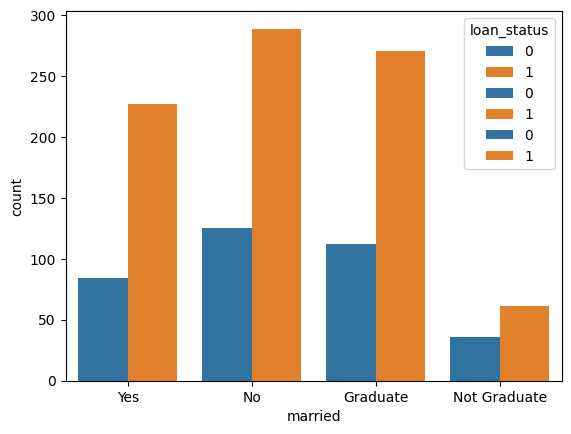

In [527]:
sns.countplot(x='married',hue='loan_status',data=df)
sns.countplot(x='education',hue='loan_status',data=df)
sns.countplot(x='self_employed',hue='loan_status',data=df)

**Splitting the data into Train and Test**

In [528]:
from sklearn.model_selection import train_test_split

In [529]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [530]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


**Model Evaluation**

In [531]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [532]:
def evaluate(true,predicted):

  acc = accuracy_score(true,predicted)
  pre = precision_score(true,predicted)
  rec = recall_score(true,predicted)
  f1 = f1_score(true,predicted)

  return acc,pre,rec,f1


**Model Validation**

In [533]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

In [534]:
models = [LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]

In [535]:
for model in models:
  model.fit(X_train,Y_train)

  Y_train_pred = model.predict(X_train)
  Y_test_pred = model.predict(X_test)

  print("Model Name:",model)
  print()

  print("Training Results:")
  acc,pre,rec,f1 = evaluate(Y_train,Y_train_pred)
  print("Accuracy:",acc)
  print("Precision:",pre)
  print("Recall:",rec)
  print("F1 Score:",f1)

  print()

  print("Testing Result:")
  acc,pre,rec,f1 = evaluate(Y_test,Y_test_pred)
  print("Accuracy:",acc)
  print("Precision:",pre)
  print("Recall:",rec)
  print("F1 Score:",f1)

  print()
  print()

  cv_score = cross_val_score(model,X,Y,cv=5)
  print("Cross Validation Score:",cv_score)
  print("Average Cross")
  print()
  print()

Model Name: LogisticRegression()

Training Results:
Accuracy: 0.8072916666666666
Precision: 0.7909090909090909
Recall: 0.981203007518797
F1 Score: 0.8758389261744967

Testing Result:
Accuracy: 0.8333333333333334
Precision: 0.8205128205128205
Recall: 0.9696969696969697
F1 Score: 0.8888888888888888


Cross Validation Score: [0.80208333 0.78125    0.77083333 0.86458333 0.80208333]
Average Cross


Model Name: SVC()

Training Results:
Accuracy: 0.7005208333333334
Precision: 0.6981627296587927
Recall: 1.0
F1 Score: 0.8222565687789799

Testing Result:
Accuracy: 0.6875
Precision: 0.6875
Recall: 1.0
F1 Score: 0.8148148148148148


Cross Validation Score: [0.6875     0.6875     0.6875     0.69791667 0.69791667]
Average Cross


Model Name: KNeighborsClassifier()

Training Results:
Accuracy: 0.7526041666666666
Precision: 0.7567567567567568
Recall: 0.9473684210526315
F1 Score: 0.8414023372287145

Testing Result:
Accuracy: 0.7083333333333334
Precision: 0.7209302325581395
Recall: 0.9393939393939394
F1

**HyperParameter Tuning**

In [536]:
hyperparameters = {
    'LR':{
        'C':[0.001,3,6,9,11],
        'max_iter':[300,600,900,1100]
    }
}

In [537]:
models = [LogisticRegression()]

In [538]:
model_keys = list(hyperparameters.keys())

In [539]:
from sklearn.model_selection import GridSearchCV

**Model Selection**

In [540]:
def ModelSelection(models,hyperparameters,X,Y):
  result = []
  i=0

  for model in models:
    key = model_keys[i]
    params = hyperparameters[key]

    print(model)
    print(params)

    grid = GridSearchCV(model,params,cv=5)
    grid.fit(X,Y)

    result.append({
        'model used':model,
        'highest score':grid.best_score_,
        'best parameters':grid.best_params_
    })

    i+=1

    result_df = pd.DataFrame(result,columns=['model used','highest score','best parameters'])

    return result_df


In [541]:
ModelSelection(models,hyperparameters,X,Y)

LogisticRegression()
{'C': [0.001, 3, 6, 9, 11], 'max_iter': [300, 600, 900, 1100]}


,model used,highest score,best parameters
0,LogisticRegression(),0.80625,"{'C': 3, 'max_iter': 300}"


In [542]:
model = LogisticRegression(C=3,max_iter=600)

In [555]:
input_data = [0, 1, 0, 1, 0, 4583, 0, 84, 360, 1, 0]

input_data_reshaped = np.asarray(input_data).reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if (prediction[0]==1):
  print('The loan is approved')
else:
  print('The loan is not approved')

[1]
The loan is approved


In [545]:
import pickle

In [546]:
filename = 'loan_model.sav'
pickle.dump(model,open(filename,'wb'))

In [547]:
loaded_model = pickle.load(open('loan_model.sav','rb'))

In [556]:
input_data = [1,1,1,1,0,4583,1508,128,360,1,0]

input_data_reshaped = np.asarray(input_data).reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('The loan is approved')
else:
  print('The loan is not approved')

[1]
The loan is approved
